# **Seaborn**
### Data visualisation library based on matplotlib
- Built in themes for styling matplotlib graphics, yielding better visualisations
- Better compatible for NumPy and Pandas data structures
- Eases a lot of things, that are considered hard for MatPlotLib

<hr>

Importing Library

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

A simple plot (Note the difference in background, from a default one)

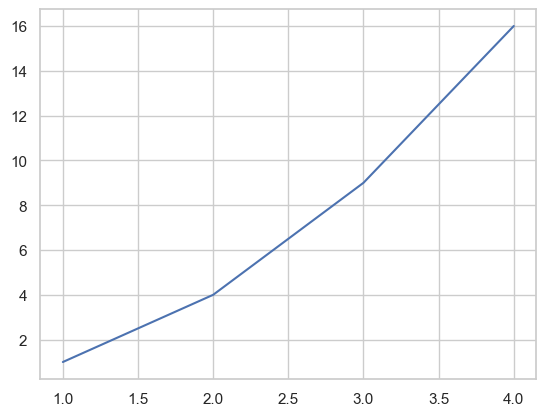

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

Importing data

In [3]:
import pandas as pd

cars = sns.load_dataset("mpg")
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Plotting a Pandas Dataframe

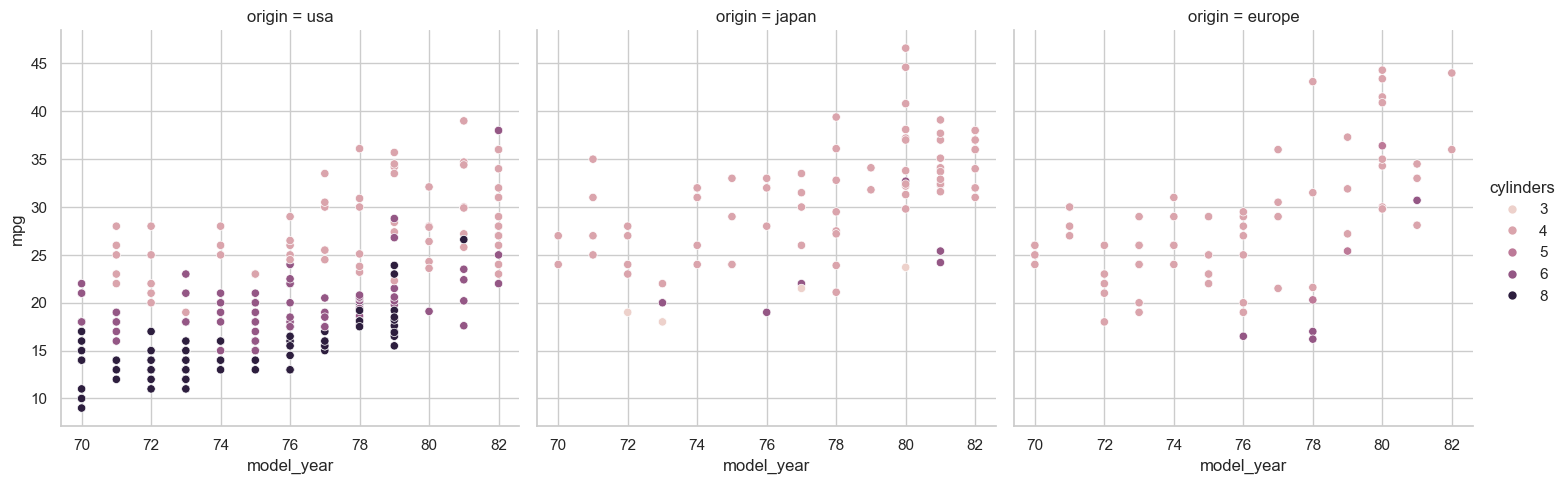

In [4]:
sns.relplot(x="model_year", y="mpg", col="origin", hue="cylinders", data=cars)
plt.show()

KDEPlot [ Kernel Density Estimation ] : Used to build a frequency distribution curve
<br>
- Two types :  Univariate (1-D) and Bivariate (2-D)

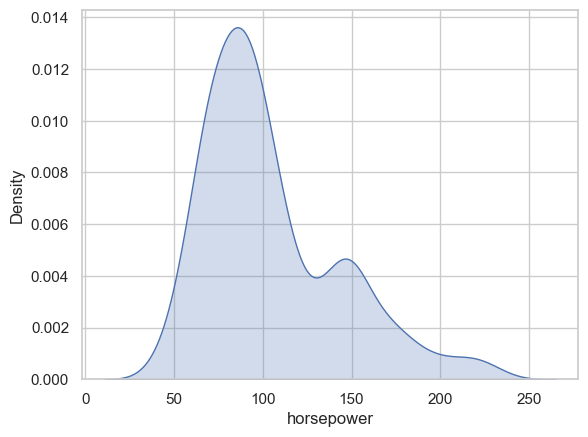

In [5]:
sns.kdeplot(cars.horsepower, fill=True)
plt.show()

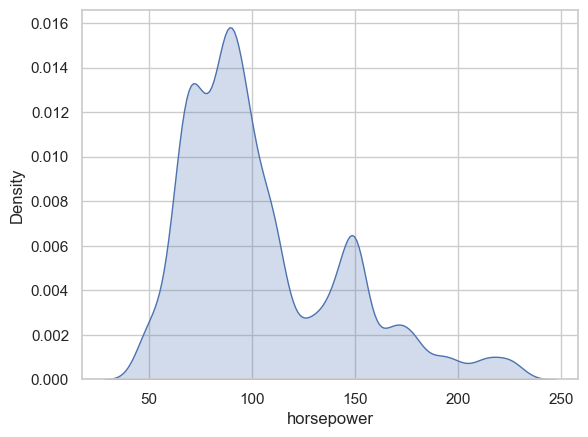

In [6]:
sns.kdeplot(cars.horsepower, fill=True, bw_adjust=0.5)
plt.show()

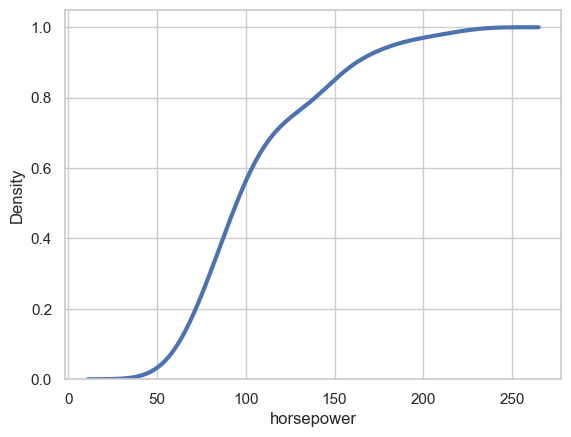

In [7]:
sns.kdeplot(cars.horsepower, cumulative=True, lw=3)
plt.show()

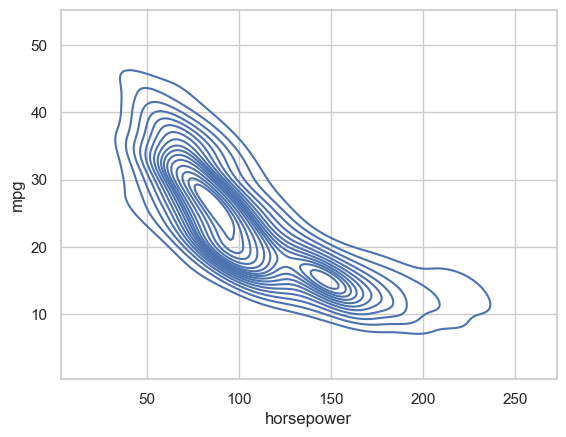

In [8]:
sns.kdeplot(x=cars.horsepower, y=cars.mpg, n_levels=17)
plt.show()

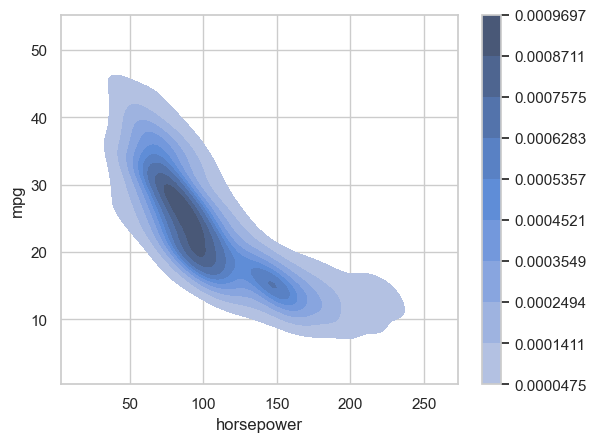

In [9]:
sns.kdeplot(x=cars.horsepower, y=cars.mpg, fill=True, cbar=True)
plt.show()

HistPlot [ Histogram Plot ] : A histogram

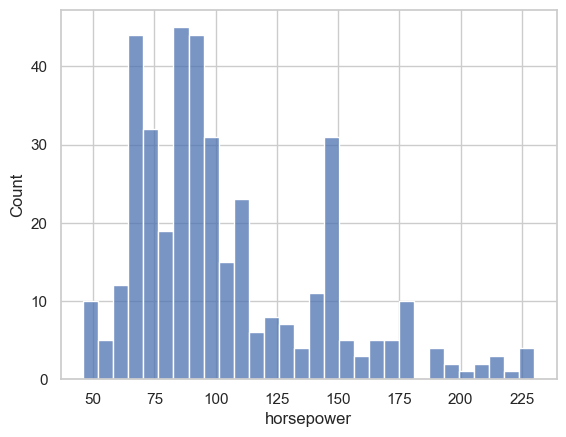

In [10]:
sns.histplot(cars.horsepower, bins=30)
plt.show()

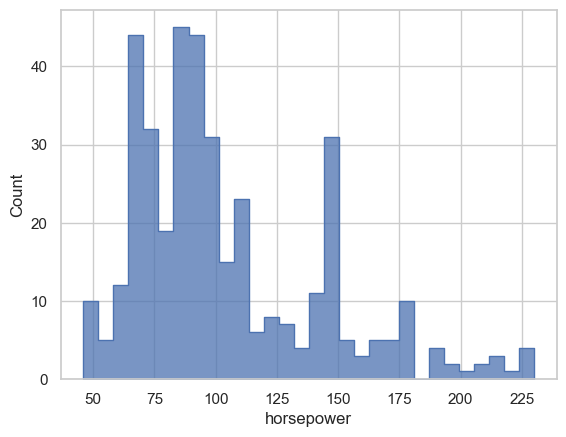

In [11]:
sns.histplot(cars.horsepower, element="step", bins=30)
plt.show()

DisPlot [ Distribution Plot ] : Combination of various frequency distribution plots

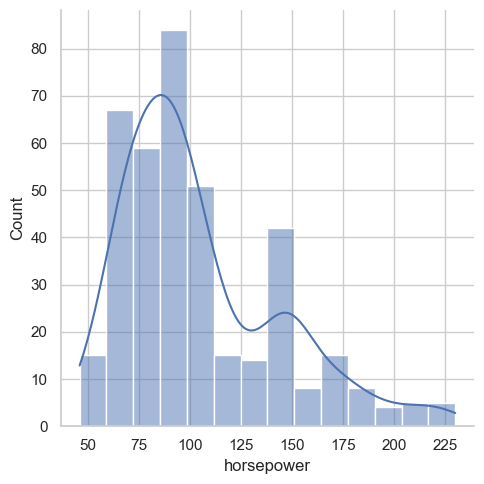

In [12]:
sns.displot(cars.horsepower, kind="hist", kde=True)
plt.show()

BoxPlot : To visualise the 25th percentile, Median, 75th percentile and outliers in the data

In [13]:
tmp = cars[cars.cylinders.isin([4, 6, 8])]
tmp.mpg.describe()

count    391.000000
mean      23.515345
std        7.847549
min        9.000000
25%       17.000000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

<Axes: ylabel='mpg'>

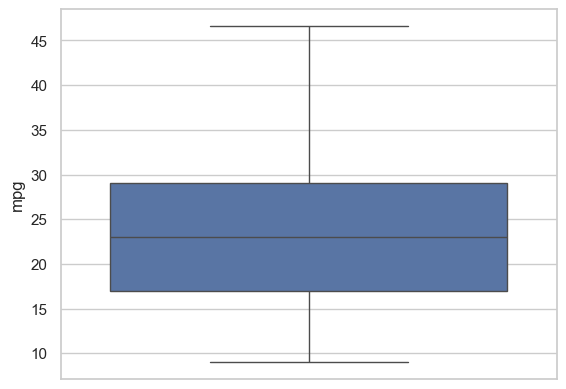

In [14]:
sns.boxplot(tmp.mpg)

<Axes: xlabel='origin', ylabel='mpg'>

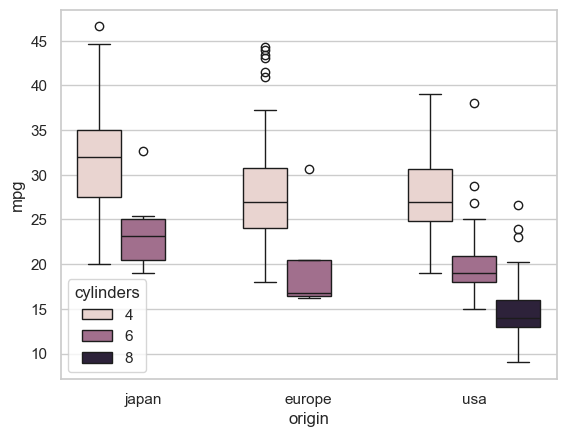

In [15]:
sns.boxplot(x=tmp.origin, y=tmp.mpg, hue=tmp.cylinders, order=["japan", "europe", "usa"])

Violin Plot : Combination of KDE and Box Plot

<Axes: xlabel='origin', ylabel='mpg'>

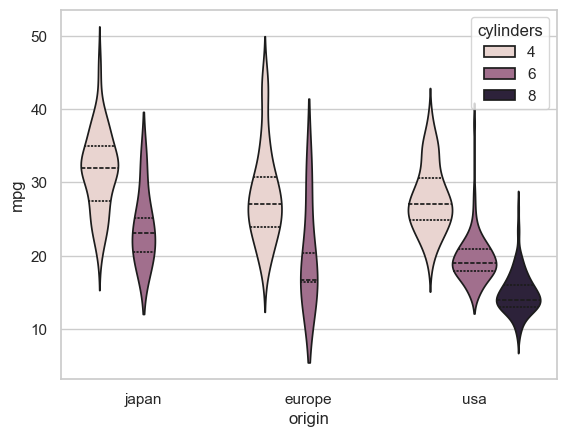

In [16]:
sns.violinplot(x=tmp.origin, y=tmp.mpg, hue=tmp.cylinders, order=["japan", "europe", "usa"], inner='quartile')

<Axes: xlabel='origin', ylabel='mpg'>

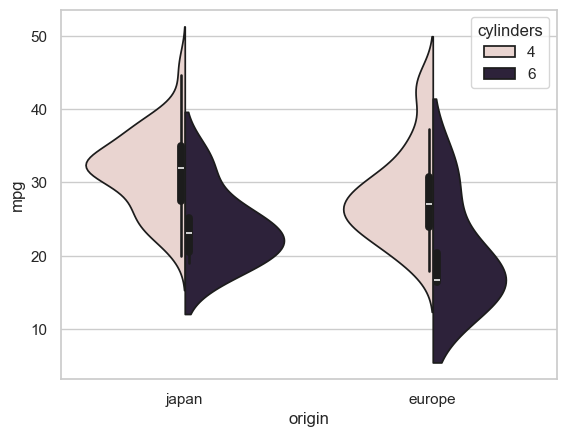

In [17]:
sns.violinplot(x='origin', y='mpg', hue='cylinders', data=tmp[tmp.origin.isin(['japan', 'europe'])], split=True)

<Axes: xlabel='origin', ylabel='mpg'>

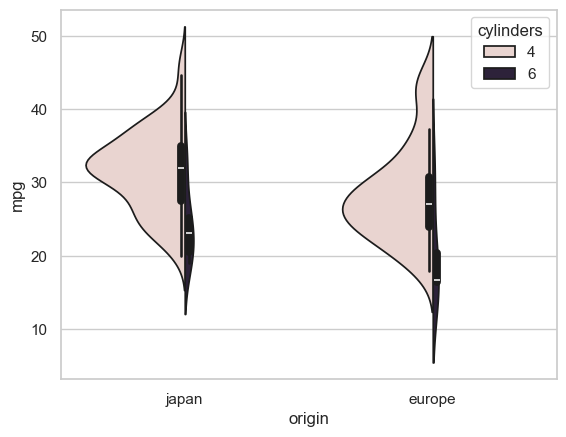

In [18]:
sns.violinplot(x='origin', y='mpg', hue='cylinders', data=tmp[tmp.origin.isin(['japan', 'europe'])], split=True, density_norm="count", common_norm=True)

Scatterplot : Relational dot plot

<Axes: xlabel='mpg', ylabel='horsepower'>

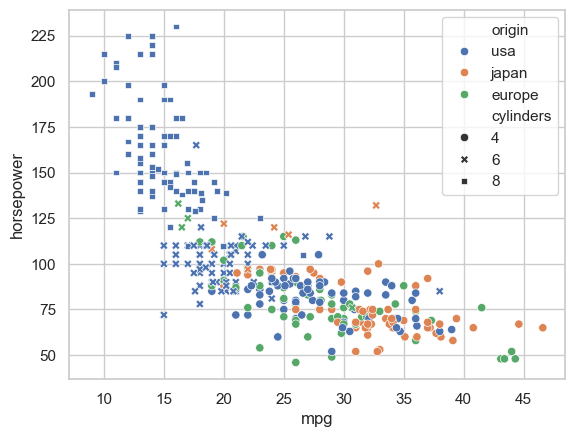

In [19]:
sns.scatterplot(x=tmp.mpg, y=tmp.horsepower, hue=tmp.origin, style=tmp.cylinders)

LinePlot : Line Graph, but with a confidence value (Bootstrapping is used to calculate this) associated with it

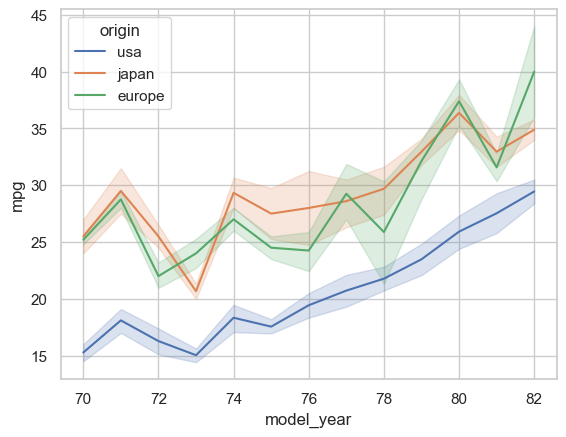

In [20]:
sns.lineplot(x=tmp.model_year, y=tmp.mpg, hue=tmp.origin, errorbar=('ci', 69))
plt.show()

HeatMap : Colour based frequency visualisation

<Axes: xlabel='model_year', ylabel='origin'>

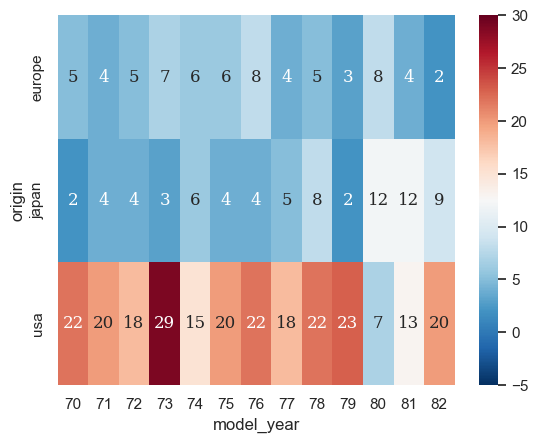

In [21]:
dat = tmp.groupby("origin").model_year.value_counts().unstack().fillna(0)
sns.heatmap(dat, cmap="RdBu_r", vmin=-5, vmax=30, annot=True, fmt=".0f", annot_kws={"family": "serif"})

PairPlot : Multiple plots of every single numerical field vs every single numerical field in the data provided

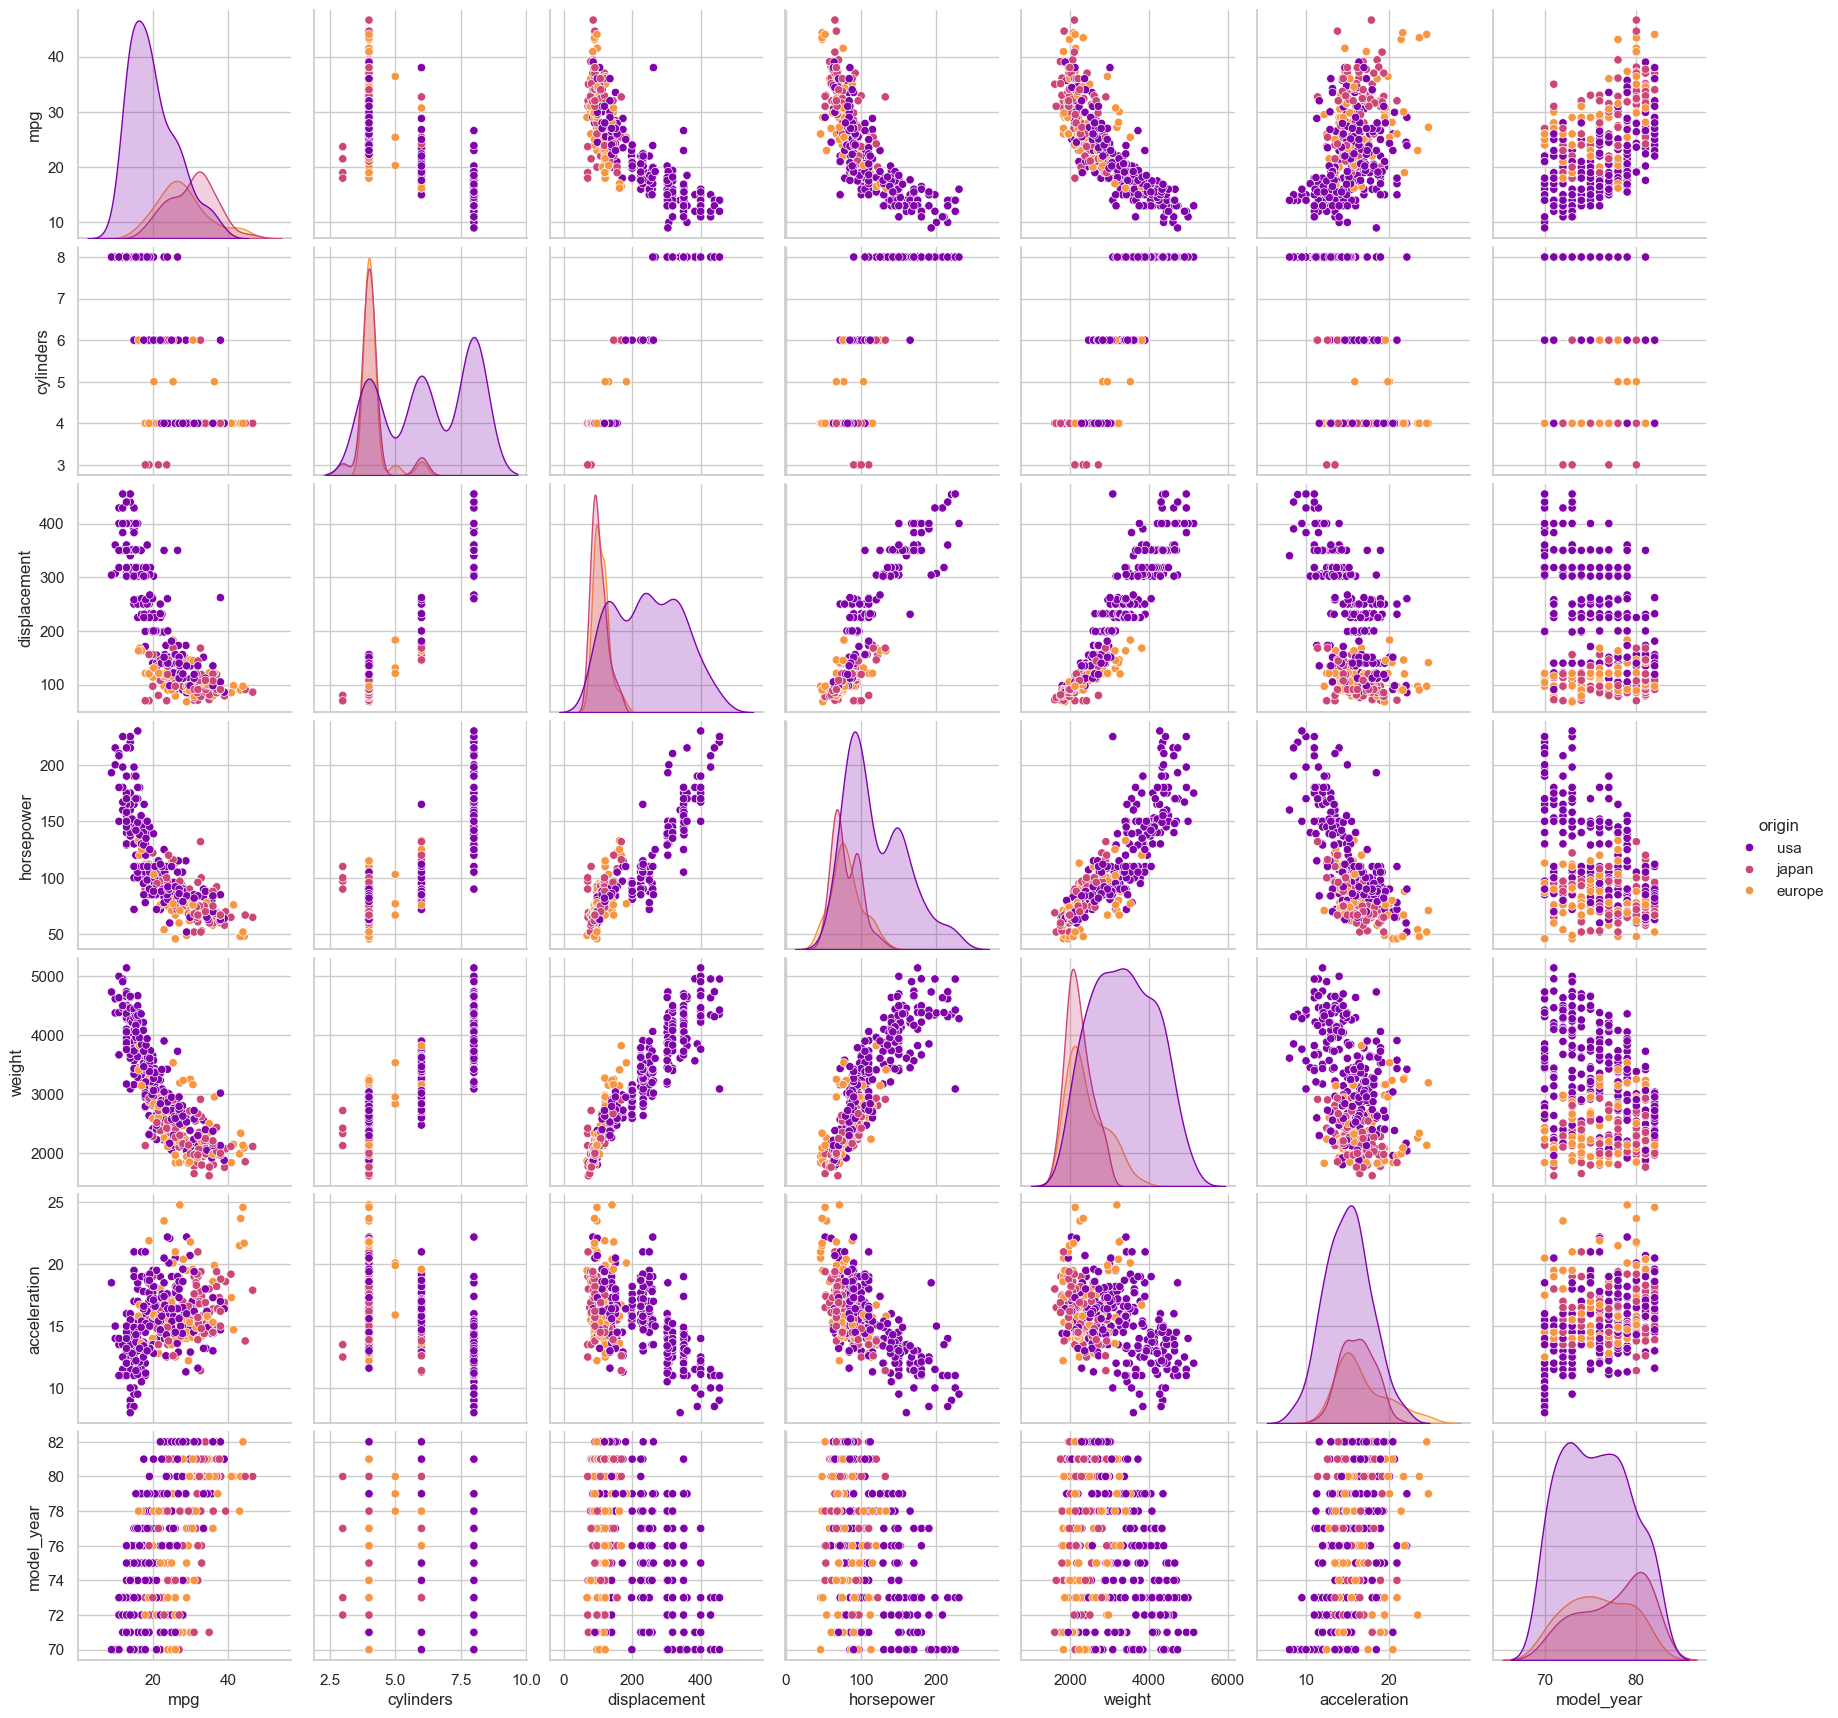

In [22]:
sns.pairplot(cars, hue="origin", palette="plasma")
plt.show()

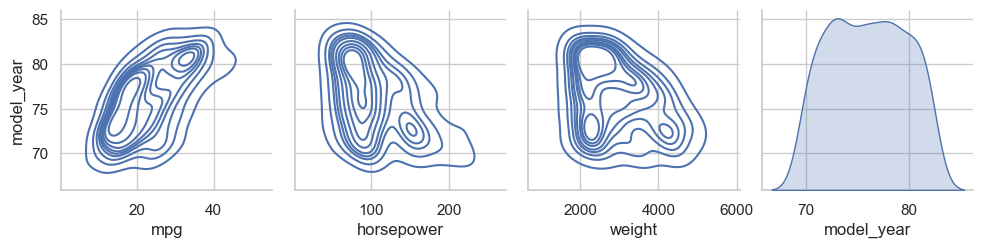

In [23]:
sns.pairplot(cars, kind="kde", diag_kind="kde", y_vars=["model_year"], x_vars=["mpg", "horsepower", "weight", "model_year"])
plt.show()

BarPlot : Categorically estimated value bar plot, together with a confidence level

C:\Users\AviLOL\AppData\Local\Temp\ipykernel_25508\4074637044.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="origin", y="mpg", hue="cylinders", data=tmp, ci=None)


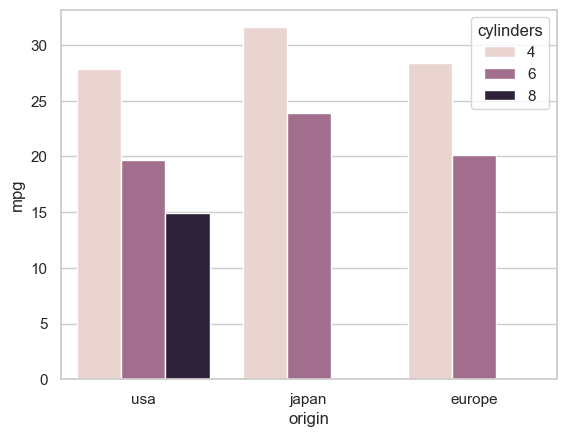

In [24]:
sns.barplot(x="origin", y="mpg", hue="cylinders", data=tmp, ci=None)
plt.show()

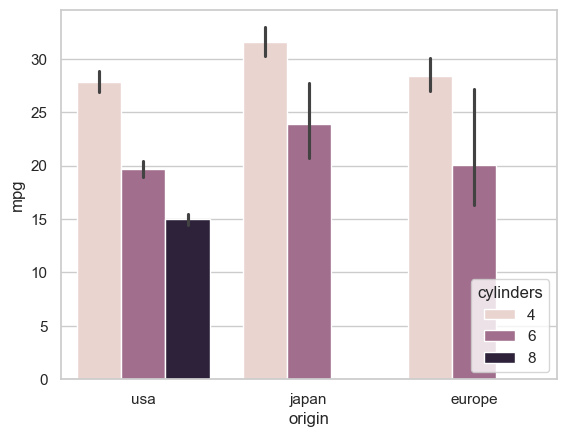

In [25]:
sns.barplot(x="origin", y="mpg", hue="cylinders", data=tmp)
plt.show()

CountPlot : Bar plot for the number of observation in each categorical data

<Axes: xlabel='origin', ylabel='count'>

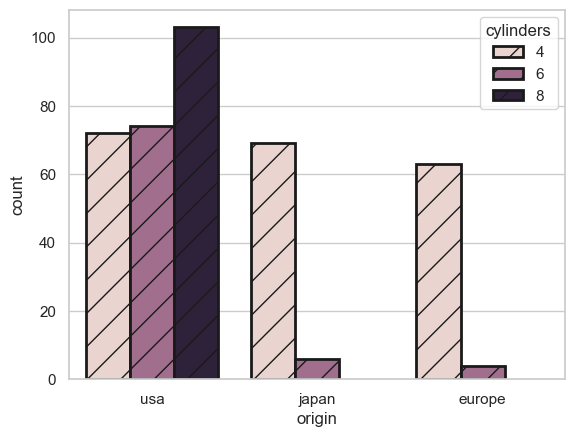

In [26]:
sns.countplot(x="origin", hue="cylinders", data=tmp, lw=2, ec="k", hatch="/")